### Nearest neighbors on cancer data.

In [67]:
from sklearn.neighbors import *
import pandas as pd
from sklearn.datasets import load_breast_cancer
import sklearn as sk
import matplotlib.pyplot as plt

In [68]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names) # assign feature names to the columns.

print(sorted(list(cancer.target_names)))  # we have two targets ['benign', 'malignant']
df.head()

['benign', 'malignant']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
print('The index of malignant:', list(cancer.target_names).index('malignant'))
df['malignant'] = 1-cancer.target

The index of malignant: 0


In [70]:
y=df.pop('malignant') # we create a new df from our original df where we drop the malignant.
X= df.copy(deep=True) # Create a new DF which will be the deep copy of our original df.

##### We apply the function train_test_split which randomly splits a dataset into two parts: a training set and a testing set.
##### Where X and y represents the features (X) and labels (y) of the dataset.
##### Test size: represent the proportion of the data to be allocated to the testing set. (in this case 20%)
##### Random state: is the same function as set.seed in R. Hence the split is reproducible.
##### The fucntion returns 4 arrays. which represents the training and test features and labels respectively

In [71]:
X_train, X_test, y_train,y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,25)

In [73]:
for num_neigbors in neighbors_setting:
    clf = sk.neighbors.KNeighborsClassifier(n_neighbors=num_neigbors)
    clf.fit(X_train, y_train)
    # store accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))

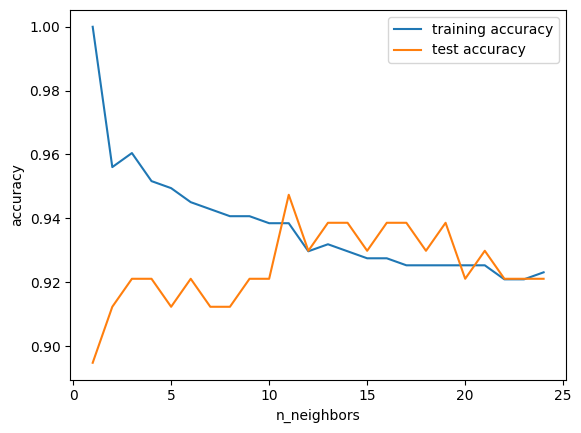

In [74]:
plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [75]:
# choose the best model from plot, and generation confusion matrix for that
# choose  model ( num_neighbors ~ 11)
# We are committing a major sin here. What is it?
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [76]:
y_model= clf.predict(X_test)
clf.score(X_train, y_train)
print(f"Confusion Matrix: {sk.metrics.confusion_matrix(y_test,y_model)}")
print(f"Accuracy Score: {sk.metrics.accuracy_score(y_test,y_model)}")

Confusion Matrix: [[72  0]
 [ 6 36]]
Accuracy Score: 0.9473684210526315


In [77]:
##### Generate prediction then add it to a df, export to excel.
results = pd.DataFrame(X_test)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
results['actual_malignant'] = y_test
results['pred_malignant'] = y_pred
results['pred_prob_malignant'] = y_pred_prob[:, 1]
results.to_excel("~/Documents/cancer_model.xls", header=True, index=True)



/var/folders/sy/f2fwzypn4bd2g84g3n7zc4q80000gn/T/ipykernel_92511/3875925409.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  results.to_excel("~/Documents/cancer_model.xls", header=True, index=True)
